In [1]:
from interfaces import *
from utilities import *
import numpy as np
from scipy import stats
from copy import deepcopy
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
#BSpline parameters
n = 19#4
p = 3
# Number of least square points
n_ls = 140

# Open knot vector
knots = np.zeros(n+2*(p+1))

knots = np.linspace(0,1,len(knots))
knots[0:p+1] = 0
knots[-p-1::] = 1
print len(knots), p
vsl = BsplineVectorSpace(p, knots)
print vsl.n_dofs
#BSpline parameters
n += 1 
p = 3
# Number of least square points
n_ls = 140

# Open knot vector
knots = np.zeros(n+2*(p+1))

knots = np.linspace(0,1,len(knots))
knots[0:p+1] = 0
knots[-p-1::] = 1
print len(knots), p
vsl_long = BsplineVectorSpace(p, knots)
print vsl_long.n_dofs

class Antenna(object):
    def __init__(self, cp, vs):
        self.cp = cp
        self.vs = vs
    
    def plot(self, t):
        s = linspace(0,1,50)
        c = self.vs.element(self.cp[:,t,:])
        plot(c(s)[0], c(s)[1])
        plot(self.cp[:,t,0], self.cp[:,t,1], '-or')

    def plot_curve(self, t):
        s = linspace(0,1,50)
        c = self.vs.element(self.cp[:,t,:])
        plot(c(s)[0], c(s)[1])
        #plot(self.cp[:,t,0], self.cp[:,t,1], '-or')
        
    def plot_curve_comparison(self, t, points):
        s = linspace(0,1,50)
        c = self.vs.element(self.cp[:,t,:])
        hold(True)
        plot(c(s)[0], c(s)[1])
        plot(points[:,0], points[:,1], '--')



27 3
23
28 3
24


In [3]:
# Spiral parameters:
wavenumb = 5.5 #3.5 - 5.5 lunghezza di un passo
length = 11 # 6 - 11
radius = wavenumb / 6
L_1 = 2 * pi * sqrt(radius**2 + (wavenumb/2/pi)**2)
print length, L_1
nturns = length/L_1
heigth = nturns * wavenumb
#nturns = heigth/wavenumb
offset = wavenumb/3
# Spiral analytical expression
cz = lambda x: radius*sin(nturns*2*pi*x)
cy = lambda y: radius*cos(nturns*2*pi*y)
cx = lambda z: heigth*z+offset

print nturns, heigth, radius


11 7.96384561721
1.38124224511 7.59683234809 0.916666666667


In [20]:
L_tot = 10
n_turn = 2
R = 1
L_1_new = L_tot / n_turn
wave_numb = sqrt((2*pi)**2 * ((L_1_new/2/pi)**2)-R**2)
heigth_new = n_turn *wave_numb
# print heigth_new, wave_numb
heigth_new_tot = heigth_new + 1./4 * heigth_new / n_turn
# print heigth_new_tot
print wave_numb
print 0.43/wave_numb, 0.43/wave_numb/2/pi, 0.43/L_1_new

L_tot = 10
n_turn = 3
R = 1
L_1_new = L_tot / n_turn
wave_numb = sqrt((2*pi)**2 * ((L_1_new/2/pi)**2)-R**2)
heigth_new = n_turn *wave_numb
# print heigth_new, wave_numb
heigth_new_tot = heigth_new + 1./4 * heigth_new / n_turn

print 0.18/wave_numb,0.18/wave_numb/2/pi, 0.18/L_1_new

L_tot = 5
n_turn = 2
R = 1
L_1_new = L_tot / n_turn
wave_numb = sqrt((2*pi)**2 * ((L_1_new/2/pi)**2)-R**2)
heigth_new = n_turn *wave_numb
# print heigth_new, wave_numb
heigth_new_tot = heigth_new + 1./4 * heigth_new / n_turn
print 0.2545/wave_numb, 0.2545/wave_numb/2/pi, 0.2545/L_1_new
# print 0.0217111*0.1/wave_numb*120
# print .0297976*0.1/wave_numb*120
print 0.02/0.063

3.87298334621
0.111025522591 0.0176702607298 0.086
0.103923048454 0.0165398668627 0.06
0.146935643509 0.0233855339808 0.12725
0.31746031746


In [28]:
L_tot = 10.
n_turn = 2
L_1_new = L_tot / n_turn
R = L_1_new/(2*pi*sqrt(1+1/(2*pi)**2))
wave_numb = R
print 2 * pi * sqrt(R**2 + (wave_numb/2/pi)**2)
# wave_numb = sqrt((2*pi)**2 * ((L_1_new/2/pi)**2)-R**2)
heigth_new = n_turn *wave_numb
# print heigth_new, wave_numb
heigth_new_tot = heigth_new + 1./4 * heigth_new / n_turn
print heigth_new_tot
print wave_numb, wave_numb*2
# print 0.43/wave_numb, 0.43/wave_numb/2/pi, 0.43/L_1_new
print 2*pi*R

L_tot = 10.
n_turn = 3
L_1_new = L_tot / n_turn
R = L_1_new/(2*pi*sqrt(1+1/(2*pi)**2))
wave_numb = R
heigth_new = n_turn *wave_numb
# print heigth_new, wave_numb
heigth_new_tot = heigth_new + 1./4 * heigth_new / n_turn
print heigth_new_tot
print wave_numb, wave_numb*2
print 2*pi*R

L_tot = 10.
n_turn = 1
L_1_new = L_tot / n_turn
R = L_1_new/(2*pi*sqrt(1+1/(2*pi)**2))
wave_numb = R
heigth_new = n_turn *wave_numb
# print heigth_new, wave_numb
heigth_new_tot = heigth_new + 1./4 * heigth_new / n_turn
print heigth_new_tot
print wave_numb, wave_numb*2
print 2*pi*R

# print 0.18/wave_numb,0.18/wave_numb/2/pi, 0.18/L_1_new

L_tot = 5.
n_turn = 2
L_1_new = L_tot / n_turn
print L_1_new
R = L_1_new/(2*pi*sqrt(1+1/(2*pi)**2))
wave_numb = R
heigth_new = n_turn *wave_numb
# print heigth_new, wave_numb
heigth_new_tot = heigth_new + 1./4 * heigth_new / n_turn
# print 0.2545/wave_numb, 0.2545/wave_numb/2/pi, 0.2545/L_1_new
# print 0.0217111*0.1/wave_numb*120
# print .0297976*0.1/wave_numb*120
print heigth_new_tot
print wave_numb, wave_numb*2
print 2*pi*R


5.0
1.76823816162
0.785883627388 1.57176725478
4.93785246076
1.70274785934
0.523922418259 1.04784483652
3.2919016405
1.96470906847
1.57176725478 3.14353450955
9.87570492151
2.5
0.884119080811
0.392941813694 0.785883627388
2.46892623038


(3, 150) [ 0.  0.  0.]
(3, 140)
[[ 0.          0.          0.22916667  0.45833333  0.6875      0.91666667
   1.14583333  1.375       1.60416667  1.83333333]
 [ 0.          0.          0.11458333  0.22916667  0.34375     0.45833333
   0.57291667  0.6875      0.80208333  0.91666667]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
(24, 3)
[ 0.          0.          0.22916667  0.45833333  0.6875      0.91666667
  1.14583333  1.375       1.60416667  1.83333333]
[ 0.          0.26734752  0.51149104  0.73370443  0.93526155  1.11743629
  1.28150251  1.42873409  1.5604049   1.67778882]


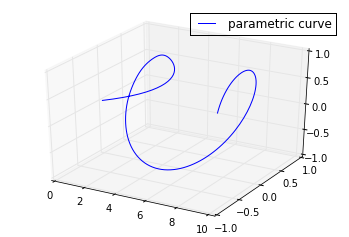

In [5]:
#vs = BsplineVectorSpace(p, knots)

# Least square parameter points
t = linspace(0,1,n_ls) 

# Least square points of the curve
F = array([np.zeros(n_ls+10), np.zeros(n_ls+10), np.zeros(n_ls+10)])
print F.shape, F[:,0]
#F[:,0] = [0.,0.,0.]
print F[:,10:].shape
F[:,10:] = array([cx(t), cy(t), cz(t)])
F[:,1:10] = array([np.linspace(0,F[0,10],9),np.linspace(0,F[1,10],9),np.linspace(0,F[2,10],9)])
print F[:,:10]
# Least square matrix
t = linspace(0,1,n_ls+10)
M = interpolation_matrix(vsl_long, t)

# Control points and curve
CP = lstsq(M, F.T)[0]

print CP.shape
CP[0,:] = [0.,0.,0.]
fig = plt.figure()
ax = fig.gca(projection='3d')
spiral = vsl_long.element(CP)
#theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
x = spiral(t)[0]
y = spiral(t)[1]
z = spiral(t)[2]
#x = F[0,:]
#y = F[1,:]
#z = F[2,:]
print F[0,:10]
print x[:10]
ax.plot(x, y, z, label='parametric curve')
ax.set_xlim3d(0, 10.2)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

ax.legend()



In [6]:
def spiral_movement(CP_old, CP_new, theta):
#     R = matrix([[1, 0, 0],[0, cos(theta), -sin(theta)],[0, sin(theta), cos(theta)]]
    CP_new[:,0] = CP_old[:,0]
    CP_new[:,1] = cos(theta) * CP_old[:,1] - sin(theta) * CP_old[:,2]
    CP_new[:,2] = cos(theta) * CP_old[:,2] + sin(theta) * CP_old[:,1]


(24, 5, 3)


(-1, 1)

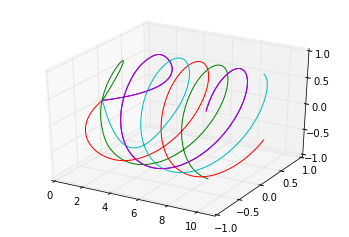

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
nstep=5
CP_new=zeros([CP.shape[0],nstep,CP.shape[1]])
print CP_new.shape
k=0

for i in np.linspace(0, 2*pi, nstep):
    spiral_movement(CP[:,:], CP_new[:,k,:], i)
    spiral = vsl_long.element(CP_new[:,k,:])
    k+=1
    #theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
    #x = F[0,:]
    x = spiral(t)[0]
    #print x
    #y = F[1,:]
    y = spiral(t)[1]
    #z = F[2,:]
    z = spiral(t)[2]
    ax.plot(x, y, z, label='parametric curve')
ax.set_xlim3d(0, length)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)


In [8]:
arky = ArcLengthParametrizer(vsl_long, CP_new[:,:,:], 2, 1)
CP_new_arclength = arky.reparametrize()


We will interpret wathever there is between first and last indeces of init_control_points shape as a list among which reparametrize
Starting the reparametrization
Assembling the LS constrained system
Solving the constrained system
Assembling the LS constrained system
Solving the constrained system
Assembling the LS constrained system
Solving the constrained system
Assembling the LS constrained system
Solving the constrained system
Assembling the LS constrained system
Solving the constrained system


(-1, 1)

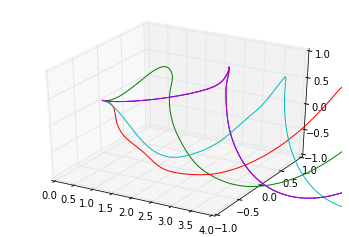

In [9]:
k=0
fig = plt.figure()
ax = fig.gca(projection='3d')

for i in np.linspace(0, 2*pi, nstep):
    spiral = vsl_long.element(CP_new_arclength[:,k,:])
    k+=1
    #theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
    #x = F[0,:]
    x = spiral(t)[0]
    #print x
    #y = F[1,:]
    y = spiral(t)[1]
    #z = F[2,:]
    z = spiral(t)[2]
    ax.plot(x, y, z, label='parametric curve')
ax.set_xlim3d(0, 4)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)


In [10]:
def tangent_continuer(m, point2, new_points, L, Lfin, Np, n_p, direction):
    dl = (Lfin-L)/n_p 
    alpha = np.arctan(m)
    print point2[0]
    if(direction>0):
        dx = dl / np.sqrt(1 + m**2)
    else:
        dx = - dl / np.sqrt(1 + m**2)
    new_points[:,0] = np.linspace(point2[0],point2[0] + n_p * dx, n_p)
    new_points[:,1] = np.linspace(point2[1],point2[1] + n_p * dx * m, n_p)#np.arange(point2[1],point2[1] + m * np * dx, m * dx)
    
    


In [11]:
# Guasto_CP_rep_try[:,-1,:]=Guasto_CP_rep_try[:,0,:]
# np.save('/Users/nicolagiuliani/giuliani-code/blender/CP_Guasto_rep', Guasto_CP_rep_try[:,:,:])
# ant_try.plot(0)
# ant_try.plot(12)
# #ant_try.plot(12)